# Introduction to LangChain
---------
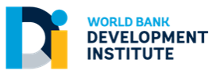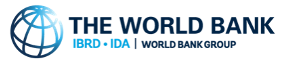

**DIHPA'24**

**Author:** <font color='blue'>Dunstan Matekenya</font> 

**Affiliation:** <font color='#F88379'>DECAT, The World Bank Group</font> 

**Date:** <span style="color:#3EACAD">May 30, 2024</span>


## What you will learn 
In this notebook, you will learn the basics of the LangChain platform as follows.
1. **LLM capabilities.** Explore LLM capabilities using LangChain
2. **Interacting with LLMs.** Use LangChain functions such as chains, prompt templates and more to connect to LLMs
3. **RAG.**. Implementing a simple RAG in Langchain by connecting to external documents
4. **LangChain Expression Language (LCEL).**. How to use LCEL instead of functions when interacting with LLMs
5. **LangChain Agents.**. 

## Expected Broad Learning Outcomes
1. **Connecting to LLMs.** An understanding of how to connect to varios open source and proprietary LLMs using Hugging Face and proprietary specific frameworks such as that for OpenAI and Mistral
2. **Different LLMs.**. There are many varieties of LLMs: ```chat, instruct, question-answer, sentiment-analysis, instruct``` and more. Have basic understanding of differences across these models and when to use which one.
3. **The role of memory in Chat models.** Understand the importance of having memory in a chatbot and different strategies for doing it with LangChain.
4. **The process of implementing RAG in LangChain**. RAG is one of the most commonly used approach for implementing chats as it enables connection to external custom data. Have a good understanding of the main steps involved in implementing a RAG based system-the steps are the same in LangChain and other frameworks.
5. **Understand the role vector databases.** Vector databases are an integral part of working with LLMs. make sure you understand how they fit in the ecosystem and why they are important.

# Setup

------

## Import Packages
We will import packages as we go so that you appreciate which class we are using.

In [1]:
import os
from pathlib import Path

## Setup API Keys

In [2]:
# ====================
# Setup API Keys
# ====================
# Although its not recommended for security, you can also just 
# paste your API keys 
#OPENAI_API_KEY
#HUGGINGFACEHUB_API_TOKEN

## Setup input directories 
Lets organize where our data is stored so that we can easily access it. Please refer to the slides for recommended folder setup. Copy and paste the full paths to your working folder in the variables below.

In [4]:
# Replace this folder with your working folder 
DIR_WD = Path("/Users/dunstanmatekenya/Google Drive/My Drive/GenAI-Course/Mod2-LLM-Overview/")

# data folder
DIR_DATA = DIR_WD.joinpath("data")

# We can also set file names for data files we will use to save time
FILE_HEP_CHAD = DIR_DATA.joinpath("Hepatitis-Chad.pdf")

FILE_MIDDLE_EAST_COVID = DIR_DATA.joinpath("MidEast-COVID.pdf")

FILE_DENGUE = DIR_DATA.joinpath("Dengue-Global-situation.pdf")

# 1. Exploring Language Tasks that LLMs can Perform
In this section, we will explore what type of NLP tasks LLMs can perfom using the Hugging Face transformer package. In some cases, when we specifiy a specific model, the transformers package will take some time to download the model files. Also, the idea here is to show very simple capabilities. In a real world project, you can train and fine-tune the transformer models on your own dataset. For example, to do a fully fledged sentiment analysis with Hugging Face, take a look at [this tutorial] (https://huggingface.co/blog/sentiment-analysis-python).

>Note that for almost all of these tasks, you can replace the English text with French text and still get similar results

## 1. 1 Text and Document Classification
Text and document classification are closely related tasks. In **text classification**, we assign predefined categories to individual pieces of text while in **document classification** refers to the process of assigning predefined categories to longer pieces of text, such as entire documents, articles, or reports.

- **Examples of text classification tasks**. Sentiment Analysis; Intent Detection;
- **Examples of document classification**. Topic categorization, 

### Sentiment Analysis with the Hugging Face Transformers Library

In [5]:
# We use transformers ```pipeline library
from transformers import pipeline

llm = pipeline("text-classification")
text = "I'm really enjoying my stay in Tunis"
outputs = llm(text)
print(outputs[0]['label'])

/Users/dunstanmatekenya/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/Users/dunstanmatekenya/anaconda3/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


POSITIVE


## 1.2 Text Generation
Text generation is a process in natural language processing (NLP) where a machine learning model generates coherent and contextually relevant text based on a given input or prompt. This technology is used in various applications such as chatbots, automated content creation, machine translation, and more.

In real life, the text is not always coherent, based on the model, when we use a default model, the results are not good. 

In [6]:
llm = pipeline("text-generation")
prompt = "Malawi is famous for "
outputs = llm(prompt, max_length=100)
print(outputs[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 6c0e608 (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Malawi is famous for urchin, the rice used in the national diet, and its high price and widespread lack of access to good sources of water are driving thousands of people into poverty. So far, the government has been able to bring in more than $2 billion through loans, while food aid has been limited in its expansion, for example by one million poor people trying to come back from war-ravaged country.

As for the country's food safety, the government has been


**EXERCISE-0: Try to specify a different Hugging Face model and see if you get better results**

## 1.3 Text Summarization
Text summarization is a natural language processing (NLP) task that involves creating a concise and coherent summary of a longer text document. The goal is to capture the most important information and main ideas while reducing the length of the original text. 

In [7]:
llm= pipeline("summarization", model="facebook/bart-large-cnn")
long_text = """Walking amid Gion's Machiya wooden houses is a mesmerizing experience. The beautifully
preserved structures exuded an old-world charm that transports visitors back in time, making them feel
like they had stepped into a living museum. The glow of lanterns lining the narrow streets add to the
enchanting ambiance, making each stroll a memorable journey through Japan's rich cultural history.
"""
outputs = llm(long_text, max_length=60, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

Walking amid Gion's Machiya wooden houses is a mesmerizing experience. The beautifullypreserved structures exuded an old-world charm that transports visitors back in time. The glow of lanterns lining the narrow streets add to theenchanting ambiance, making each stroll a


## 1.4 Question-Answering
Question Answering (QA) is one of the most common tasks or use casef for LLMs. In this task, the model is designed to automatically answer questions posed by humans in natural language. QA systems can be built to answer questions from a variety of sources, such as structured databases, knowledge bases, or unstructured text documents.

In [8]:
llm = pipeline("question-answering")
context = "Walking amid Gion's Machiya wooden houses was a mesmerizing experience."
question = "What are Machiya houses made of?"
outputs = llm(question=question, context=context)
print(outputs['answer'])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


wooden


## 1.5 Language Translation

In [9]:
llm = pipeline("translation_en_to_fr")
text = "This is my first time to visit Tunisia."
outputs = llm(text, clean_up_tokenization_spaces=True)
print(outputs[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision 686f1db (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


C'est ma première visite en Tunisie.


# 2.  Introducing LangChain Core Functionalities

It is always a good idea to read documentation of a framework. Please head over to [LangChain website](https://www.langchain.com) for details of core functionalities, use cases and features. The screenshot below provides a summary of LangChain ecosytem of features and capabilities. The term **Chain** in LangChain refers to the core concept of **chains** in LangChain which is a sequence(s) of calls - whether to an LLM, a tool, or a data preprocessing step. The primary supported way to do this is with LCEL (we will see this later).

In [10]:
from IPython.display import Image

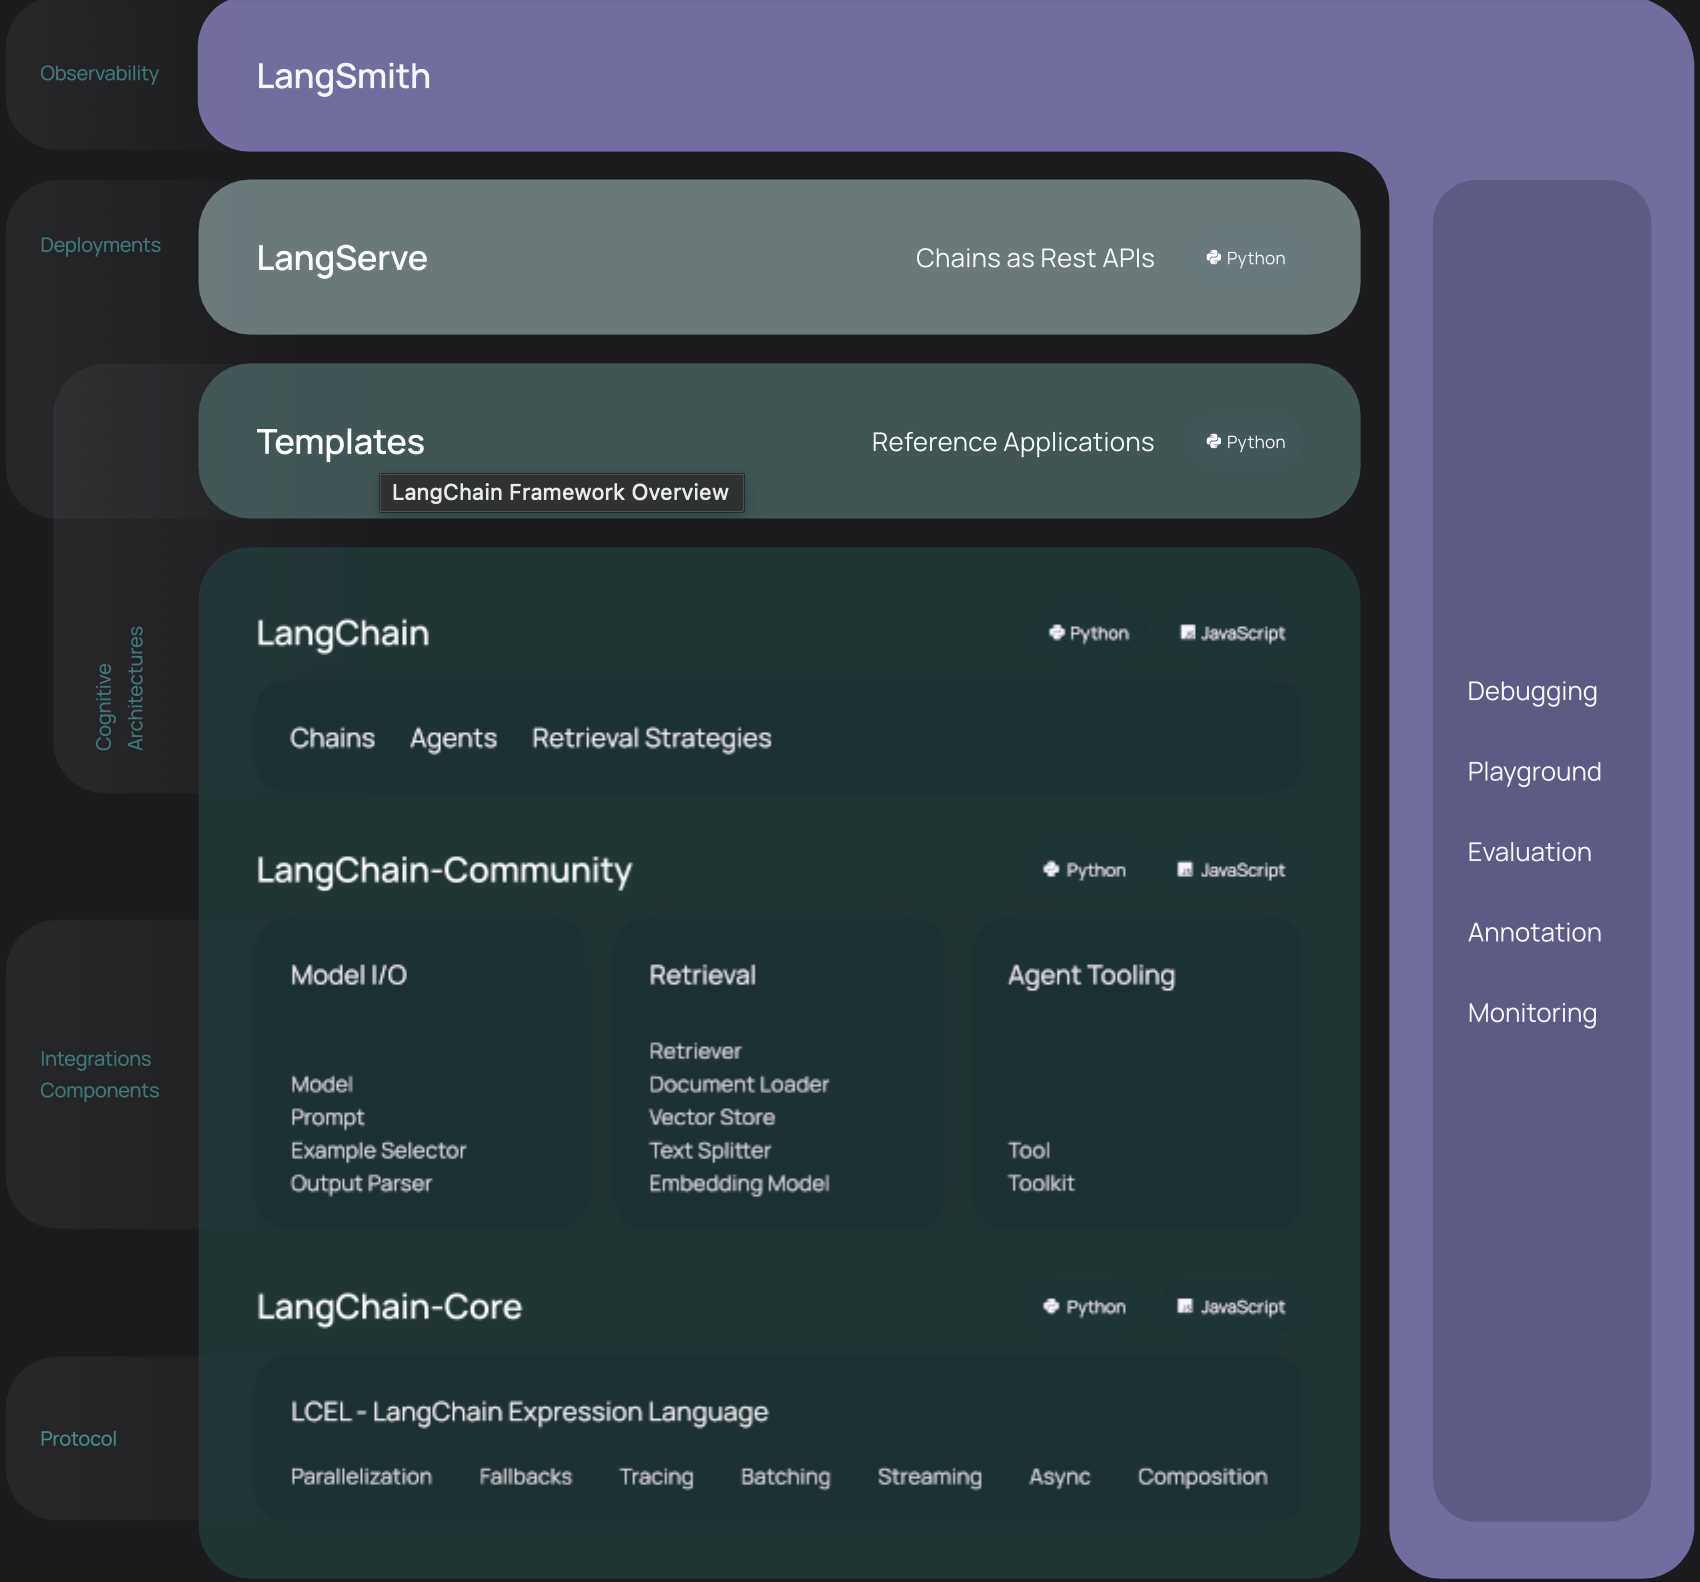

In [11]:
Image(filename='../images/LangChain-detailed.png', width=500) 

## 2.1 Interacting with Models in LangChain 
- General instruction models -  Models which can answer questions but are not quite optmized for chat
- Chat models are more optimized for question and answering
- Prompting templates and techniques 

### Trying out Open Vs. Proprietary Model
- **Accessing open source LLMs on Hugging Face.** In order to access open source LLMs from Hugging Face, you need two main inputs: ```Hugging Face token``` and the model id or url. Recall that you can explore and grab model details from the Hugging Face platform easily. Once you have that we can use ```HuggingFaceEndpoint``` or ```HuggingFaceHub``` to access and use the model.

- **Accessing proprietary LLMs (e.g., OpenAI).** LangChain has specific packages for working with OpenAI models. For other providers such as Mistral, you need to check [LangChain documentation](https://python.langchain.com/v0.1/docs/integrations/chat/mistralai/).

In [12]:
from langchain_community.llms import HuggingFaceEndpoint, HuggingFaceHub

# Lets make this a global variable in case we want to use this model
# again
MODEL_ID_FALCON = 'tiiuae/falcon-7b-instruct'

llm = HuggingFaceHub(repo_id=MODEL_ID_FALCON, 
                     huggingfacehub_api_token=HUGGINGFACEHUB_API_TOKEN)

question = 'Can you still have fun'
output = llm.invoke(question)
print(output)

Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


Can you still have fun in the rain?
Yes, you can still have fun in the rain! There are plenty of activities you can do indoors or outdoors, such as playing board games, reading a book, or going for a walk. You can also try to find creative ways to enjoy the rain, such as using a rain shower to take a bath or making a rain-soaked picnic. Just remember to stay safe and take precautions if necessary.


In [13]:
from langchain_openai import OpenAI

# Note that we will be able to select specific OpenAI models 
# If you have a paid account 
llm = OpenAI(openai_api_key=OPENAI_API_KEY)

question = 'Can you still have fun'
output = llm.invoke(question)
print(output)

Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')
Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


 if you're dead inside?

It is possible to have fun even if you feel dead inside. While feeling emotionally numb or disconnected can make it more challenging to enjoy activities or events, it is still possible to find moments of joy and pleasure.

Here are some tips for having fun even if you feel dead inside:

1. Engage in activities that have brought you joy in the past. Think back to activities or hobbies that you used to enjoy before you started feeling dead inside. Even if you don't feel the same level of excitement, engaging in these activities can still bring some enjoyment.

2. Try something new. Sometimes, trying something new can help break out of a rut and bring some fun into your life. This could be a new hobby, sport, or even a new type of food.

3. Spend time with loved ones. Being around people who care about you and make you feel loved and supported can help lift your mood and bring some fun into your life. Plan a fun outing or simply spend time talking and laughing wit

Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


In [1]:
2*1772

3544

**EXERCISE-1. Find another model on Hugging Face to try**
- Go to [Hugging Face](https://huggingface.co/models)
- Search for **Text Generation** LLMs. Note that large models can be hard and take long to run.
- Get the model Id
- Initialize the model, and ask it a question/prompt as we did with Falcon model above

### . Prompt templates
Prompt templates are used for creating prompts in a more modular way, so they can be reused and built on. Chains act as the glue in LangChain; bringing the other components together into workflows that pass inputs and outputs between the different components
- They are recipes for generating prompts
- Flexible and modular
- Can contain: instructions, examples, and additional context

In [21]:
from langchain.prompts import PromptTemplate, ChatPromptTemplate

# A String with instructions, same way we create prompts
# in GUI based interface such as chatGPT
template = "You are an artificial intelligence assistant, answer the question. {question}"
prompt = PromptTemplate(template=template, input_variables=["question"])

llm = HuggingFaceHub(repo_id=MODEL_ID_FALCON,token=HUGGINGFACEHUB_API_TOKEN)

# Create a Chain using the LLMChain() 
llm_chain = LLMChain(prompt=prompt, llm=llm)
question = "What is LangChain?"
                     
print(llm_chain.run(question))

ValidationError: 1 validation error for HuggingFaceHub
token
  extra fields not permitted (type=value_error.extra)

###  Chat Models
Chat Models are a core component of LangChain. A chat model is a language model that uses chat messages as inputs and returns chat messages as outputs (as opposed to using plain text)

In [22]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate, ChatPromptTemplate

llm = ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY)

prompt_template = ChatPromptTemplate.from_messages([
("system", "You are a helpful assistant who knows alot about Africa."),
("human","Respond to the question: {question}")]
)

full_prompt = prompt_template.format_messages(question='What is the best place to visit in Malawi?')
llm(full_prompt)

/Users/dunstanmatekenya/anaconda3/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(
Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


AIMessage(content='One of the best places to visit in Malawi is Lake Malawi. This stunning lake is known for its crystal-clear waters, beautiful beaches, and diverse marine life. Visitors can enjoy a variety of water activities such as snorkeling, diving, kayaking, and sailing. The lake is also surrounded by national parks and reserves, offering opportunities for wildlife viewing and hiking. Additionally, the lakeshore is dotted with charming villages where you can experience the local culture and hospitality. Overall, Lake Malawi is a must-visit destination for nature lovers and adventure seekers in Malawi.', response_metadata={'token_usage': {'completion_tokens': 116, 'prompt_tokens': 38, 'total_tokens': 154}, 'model_name': 'gpt-3.5-turbo', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-11f38ec0-7a4b-47d9-9080-855d38cf0f35-0', usage_metadata={'input_tokens': 38, 'output_tokens': 116, 'total_tokens': 154})

Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


## 2.2. Managing chat model memory
- A key feature of chatbot applications is the ability to have a conversation, where context from the conversation is stored and available for the model to access for later questions or reference.
- Memory is important for conversations with chat models; it opens up the possibility of providing follow-up questions, of building and iterating on model responses, and for chatbots to adapt to the user's preferences and behaviors. 
- Although LangChain allows us to customize and optimize in-conversation chatbot memory, it is still limited by the model's context window. 
- An **LLM's context window** is the amount of input text the model can consider at once when generating a response, and the length of this window varies for different models. LangChain has a standard syntax for optimizing model memory. 

There are three LangChain classes for implementing chatbot memory as follows. 
### The ```ChatMessageHistory``` Class
- The ChatMessageHistory class stores the full history of messages between the user and model. By providing this to the model, we can provide follow-up questions and iterate on the response message.
- When additional user messages are provided, the model bases its response on the full context stored in the conversation history
- We can use different tools to manage memory usage in LLM applications, and we can even integrate external data to give the models even more context. 


### The ```ConversationBufferMemory``` class
- This gives the application a rolling buffer memory containing the last few messages in the conversation. Users can specify the number of messages to store with the size argument, and the application will discard older messages as newer ones are added. 
- To integrate the memory type into model, we use a special type of chain for conversations: ```ConversationChain```. 

### The ```ConversationSummaryMemory``` class
- Summarizing important points from a conversation can also be a good way of optimizing memory. The ConversationSummaryMemory class summarizes the conversation over time, condensing the information. 
- This means that the chat model can remember key pieces of context without needing to store and process the entire conversation history

### Trying out the ChatMessageHistory class

In [ ]:
chat = ChatOpenAI(temperature=0, openai_api_key=OPENAI_API_KEY)
history = ChatMessageHistory()
history.add_ai_message("Hi! Ask me anything please.")
history.add_user_message("Describe a metaphor for learning LangChain in one sentence.")
chat(history.messages)

In [ ]:
# Ask a question based on the previous messages 
history.add_user_message("Summarize the preceding sentence in fewer words")
chat(history.messages)

In [ ]:
# Ask a question based on the previous messages 
history.add_user_message("Summarize the preceding sentence in fewer words")
chat(history.messages)

###  Trying out the ConversationBufferMemory
For many applications, storing and accessing the entire conversation history isn't technically feasible. In these cases, the messages must be condensed while retaining as much relevant context as possible. One common way of doing this is with a memory buffer, which stores only the most recent messages based on the parameter ```size```.

In [25]:
from langchain.memory import ChatMessageHistory, ConversationBufferMemory, ConversationSummaryMemory
from langchain.chains import LLMChain, ConversationChain, RetrievalQA, RetrievalQAWithSourcesChain
# Create an Open AI Chat Model
chat = OpenAI(temperature=0, openai_api_key=OPENAI_API_KEY)

# Create the memory object with size set to 2
memory = ConversationBufferMemory(size=4)
buffer_chain = ConversationChain(llm=chat, memory=memory, verbose=True)

# 
buffer_chain.predict(input="Describe a language model in one sentence")
buffer_chain.predict(input="Describe it again using less words")
buffer_chain.predict(input="Describe it again fewer words but at least one word")
buffer_chain.predict(input="What did I first ask you? I forgot.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Describe a language model in one sentence
AI:


Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')



> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Describe a language model in one sentence
AI:  A language model is a statistical model that is trained on a large corpus of text and is able to generate coherent and grammatically correct sentences based on the patterns and structures it has learned.
Human: Describe it again using less words
AI:


Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')



> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Describe a language model in one sentence
AI:  A language model is a statistical model that is trained on a large corpus of text and is able to generate coherent and grammatically correct sentences based on the patterns and structures it has learned.
Human: Describe it again using less words
AI:  A language model is a computer program that can generate sentences based on patterns it has learned from a large amount of text.
Human: Describe it again fewer words but at least one word
AI:


Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')



> Finished chain.


> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Describe a language model in one sentence
AI:  A language model is a statistical model that is trained on a large corpus of text and is able to generate coherent and grammatically correct sentences based on the patterns and structures it has learned.
Human: Describe it again using less words
AI:  A language model is a computer program that can generate sentences based on patterns it has learned from a large amount of text.
Human: Describe it again fewer words but at least one word
AI:  A language model is a program that generates sentences from text patterns.
Human: What did I first ask you? I forgot.
AI:


Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')



> Finished chain.


' You asked me to describe a language model in one sentence.'

Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


**EXERCISE-2. For the ```ConversationBufferMemory```, change the buffer size to 1 or 2 and see what happens**

## ConversationSummaryMemory
For longer conversations, storing the entire memory, or even a long buffer memory, may not be technically feasible. In these cases, a summary memory implementation can be a good option. Summary memories summarize the conversation at each step to retain the key context for the model to use. This works by using another LLM for generating the summaries, alongside the LLM used for generating the responses.

In [ ]:
# ==============================================
# PLEASE FOLLOW INSTRUCTIONS AND COMPLETE CODE
# ==============================================

# Use openAI model from earlier as a summary model
summary_llm =  YOUR CODE HERE

# Complete code below by putting in summary model above
memory = ConversationSummaryMemory(llm=summary_llm)

# Create a chat model to use in the Conversation chain below (refer
# previous cells where we created OpenAI chat model
chat_model = YOUR CODE HERE

# Create a conversation chain as we did before 
summary_chain = YOUR CODE HERE

summary_chain.predict(input="Please tell me about Malawi.")
summary_chain.predict(input="Does that affect Malawi's income?")

# 3. Adding External Documents to LLMs
As mentioned in the lectures, LLMs are trained on a specific dataset (often publicly available internet data) up to some point in time. Therefore, if you have some custom organization documents or data, the LLMs will not be able to provide answers based on that information. Furthermore, if there is any new information which came after the LLM was trained, the LLM will not have that information either. 

The main remedy to deal with this is to provide the LLM with external documents. Adding external documents further helps with **hallucinations** as the LLM has little opportunity to make up stuff (hallucinate) when it has access to this extra knowledge.

In LangChain, there are three main steps to provide external documents to the LLM (essentially create a Retrieval Augmented Generation)-**RAG Chatbot**
1. Identify the data sources (documents, datasets, websites, databases etc).

2. Load the documents into LangChain using document loaders. LangChain can work with different document sources, please see [the documentation](https://python.langchain.com/v0.1/docs/integrations/document_loaders/). 

3. Splitting the documents into chunks. 

4. Create vector embeddings and store into a vector database for retrievval

### 3.1 Document Loaders
LangChain has more than 160 document loaders. Some loaders are provided by 3rd parties who manage unique document formats. These include Amazon S3, Microsoft, Google Cloud, Jupyter notebooks, pandas DataFrames, unstructured HTML, YouTube audio transcripts, and more. 

#### PDF Document Loader
- Requires installation of the ```pypdf``` package as a dependency.
- There are many different types of PDF loaders in LangChain, and there is documentation available online for each.

In [29]:
!pip install pypdf

In [ ]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader(str(FILE_DENGUE))
data = loader.load()
print(data[0])

**EXERCISE-3. Explore other LangChain Loaders**

Check the LangChain [document loaders documentation](https://python.langchain.com/v0.1/docs/integrations/document_loaders/) 
and also check [here](https://python.langchain.com/v0.1/docs/modules/data_connection/) for most commonly used loaders.
1. Identify 5 document loaders you find interesting. What are third party document loaders?
2. **HTML loaders**. Explore the html or webpage loaders. 
3. Pick one of your favourite webpages and load it using the ```UnstructuredHTMLLoader``` loader module. Refer to the [documentation](UnstructuredHTMLLoader) on how to import the module.
4. How do you think this changes your approach to ```web-scraping```. Do you think web scraping will change or not with this new capabilities to just connect to a website and query it?

### 3.2 Preparing documents for vector database and retrieval
In this stage, there are two sub-steps:
- The document is split to enhance efficiency in storage, indexing and ultimately efficient retrieval. Furthermore, chunking also helps with ensuring the document (which act as context) can fit in the context window 
- An embedding model is used to convert the documents into ```vector embeddings```
- The vectorized data is stored into a vector database.

#### Splitting/Chunking Documents
- Given a PDF document, one naive splitting option would be to separate the document into lines as they appear in the document. This would be simple to implement but could be problematic. Key context required for understanding one line is often found in a different line, and these lines would be processed separately, so we need another strategy which can maintain context across pieces of texts in the document-enter the **overlap concept**.
We will compare two document splitting methods from LangChain. 
>- **CharacterTextSplitter** splits text based on a specified separator, looking at individual characters. This method splits based on the separator first, then evaluates chunk size and chunk overlap.
>- **RecursiveCharacterTextSplitter** attempts to split by several separators recursively until the chunks fall within the specified chunk size. There are many other methods that use natural language processing to infer meaning and split appropriately. Optimizing this is an active area of research.

There isn't one strategy that works for all situations when it comes to splitting documents. 
It's often the case of experimenting with multiple methods, and seeing which one strikes the right balance between retaining sufficient context and managing chunk size.

##### CharacterTextSplitter

In [34]:
from langchain.text_splitter import CharacterTextSplitter, RecursiveCharacterTextSplitter
quote = 'One machine can do the work of fifty ordinary humans.\
No machine can do the work of one extraordinary human.'

chunk_size = 24
chunk_overlap = 3

ct_splitter = CharacterTextSplitter(separator=".", 
                                    chunk_overlap=chunk_overlap, chunk_size=chunk_size)

docs = ct_splitter.split_text(quote)

Created a chunk of size 52, which is longer than the specified 24


In [35]:
docs

['One machine can do the work of fifty ordinary humans',
 'No machine can do the work of one extraordinary human']

##### RecursiveCharacterTextSplitter

In [36]:
# Using the same variables: chunk_size and chunk_overlap, instatiate RecursiveCharacterTextSplitter
rc_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap = chunk_overlap)
docs = rc_splitter.split_text(quote)
print(docs)

['One machine can do the', 'work of fifty ordinary', 'humans.No machine can', 'do the work of one', 'extraordinary human.']


#### Load data into a vector database
At this stage, you will be faced with a decision to choose which vector database to use. 
For our simple demonstration purpose, we will use [chromadb](https://www.trychroma.com), an open source vector database solution. The type of vector database solution you choose can depend on numerous factors such as:
- How large are the documents you will be processing
- How much money you have to spend on the project
- Efficiency/latency requirements for your use case, if you need to provide solution in real-time/fast, you may need a different solution
- Accuracy requirements. Sometimes there is a tradeoff between accuracy and latecy.
- Integration requirements with existing platforms. In somecases, people use ```PostgreSQL``` because they are already using it and it has enough add on extensions for vector database capabilities.

Another decision choice is the **embedding model**- the LLM which converts the text/documents into vectors. There are many options on the market and the choice comes down to things such as:
- Available budget
- Compatibility with the LLM you are using in the generation phase. People do use a different embedding model from the generation model
> embedding_llm = Mistral, 
> chat_model = ChatOpenAI
- Nature of documents, size and alot of other factors

In [42]:
!pip install sentence_transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.7/224.7 kB 827.6 kB/s eta 0:00:00a 0:00:01


In [ ]:
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import HuggingFaceEmbeddings


# Lets load the Cholera paper and then store it in a database
loader = PyPDFLoader(str(FILE_HEP_CHAD))
data = loader.load()

chunk_size = 100
chunk_overlap = 10

# Split with RecursiveCharacterTextSplitter
rc_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap = chunk_overlap)
docs = rc_splitter.split_documents(data)

# Lets use openAI embedding model
#embedding_model = OpenAIEmbeddings(openai_api_type=OPENAI_API_KEY)
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
# Directory to store our database-set this to the data directory
vectordb = Chroma(persist_directory=str(DIR_DATA), embedding_function=embedding_model)

# Store the databse
vectordb.persist()

# Create the database
docstorage = Chroma.from_documents(docs, embedding_model)

**EXERCISE-4. Explore what functionality is available under the database object ```docstorage_cholera```**
- You can use ```dir(object)``` to check available attributes and functions
- Note that there many search related functions which enables you to control how user queries are searcherd when building Chatbots

### 3.3 Retrieval
Now that we have added our external file. Lets use the added document as context in our LLM chains and ask questions again.

In [40]:
from langchain.chains import RetrievalQA

# Create LLM as before 
llm = OpenAI(openai_api_key=OPENAI_API_KEY)

# Create retriever with 
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=docstorage.as_retriever())

# The question we will ask the LLM
# You can ask these questions in French and LLM will also answer in French
question = "Are there any disease outbreaks in Chad?"

# Answer without RAG
output = llm.invoke(question)
print()
print("="*60)
print("LLM Output without using RAG-external document from WHO website")
print("="*60)
print(output)

# For RAG Chain, we put in the question as dictionary
print()
print("="*60)
print("LLM Output with RAG-external document from WHO website")
print("="*60)
print(qa.run(question))

Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')



LLM Output without using RAG-external document from WHO website


As of September 2021, there are several ongoing disease outbreaks in Chad. These include:

1. COVID-19: Chad has been experiencing a surge in COVID-19 cases since April 2021, with a peak in July. As of September 2021, there have been over 5,000 confirmed cases and over 170 deaths.

2. Cholera: A cholera outbreak was declared in June 2021 in the Lake Chad region, affecting areas near the border with Nigeria. As of September 2021, there have been over 2,000 suspected cases and 50 deaths.

3. Measles: Chad has been experiencing a measles outbreak since January 2020. As of September 2021, there have been over 20,000 suspected cases and over 300 deaths, mainly affecting children under the age of 5.

4. Yellow fever: A yellow fever outbreak was declared in November 2020, affecting several regions in Chad. As of September 2021, there have been over 60 confirmed cases and 10 deaths.

5. Meningitis: Chad is currently experiencin

Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')
Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')
Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


 Yes, there is currently a hepatitis E outbreak in Chad, specifically in the eastern Ouaddai province. This outbreak was last reported on May 8, 2024.


Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


**EXERCISE-5. Implement a simple RAG as we did above**
1. Use the ```FILE_MIDDLE_EAST_COVID``` file to create a new Chroma database
2. Implement a RAG chainas we did above.
3. Compare answers between a the LLM with RAG and no RAG

**Hint.** Copy and paste the code from above and edit it.

### 3.4 Retrieval with sources reference
In reallife applications, you will have hundreds or thousands of documents. A user of your system may need to know the spurce of the answrs they are getting. Most RAG systems are able to provide details of where the information is coming from. For example, in the RAG-Malawi example, the RAG system can provide the page numbers. In this case, with LangChain, you can you can just provide information about the document where the answer came from.

One method of mitigating the risk of LLM hallucinations from RAG is using RetrievalQAWithSourcesChain, which also returns the data source of the answer. Aside from the chain class, the code is exactly the same as RetrievalQA. However, this class returns a dictionary containing a 'sources' key and an 'answer' key. The 'sources' key refers to the file where the answer came from, which is helpful when there are many documents in the database.

In [ ]:
from langchain.chains import RetrievalQAWithSourcesChain

qa = RetrievalQAWithSourcesChain.from_chain_type(llm=llm, chain_type="stuff", retriever=docstorage.as_retriever())

results = qa({"question": "Are there any disease outbreaks in Chad?"},
             return_only_outputs=True)
print(results)

# 4. LangChain Expression Language (LCEL)
> In summary, LCEL is a different (recommended) syntax of achieving the same things we have done in LangChain

LCEL is a key part of the LangChain toolkit. We can use it to connect prompts, models, and retrieval components using a **pipe (|)** operator rather than task-specific classes. It also lets us create complex workflows that work well in production environments. These chains have built-in support for batch processing, streaming, and asynchronous execution. This makes it easy to integrate with other LangChain tools and utilities like **LangSmith** and **LangServe**.

A few notes about the chain with LCEL
- The ```| (pipe)``` in LCEL indicates that the output from one component will be used as the input to the next.

## 4.1 A Simple Chain with LCEL

In [ ]:
model = ChatOpenAI(openai_api_key=OPENAI_API_KEY)
prompt = ChatPromptTemplate.from_template("You are a helpful personal assistant. \
Answer the following question: {question}")

# Create Chain in LCEL fashion
llm_chain = prompt | model

# Recall how we created a chain before 
#llm_chain = LLMChain(prompt=prompt, llm=llm)


# Run using invoke
print(llm_chain.invoke("What is the capital of Tunisia?"))

## 4.2 RAG with LCEL

In [ ]:
model = ChatOpenAI(openai_api_key = OPENAI_API_KEY)

embedding_model = OpenAIEmbeddings(openai_api_key = OPENAI_API_KEY)
vectorstore = Chroma.from_texts(["Dunstan stayed in Tunis, the capital of Tunisia from Sunday May 26 to Satarday May 31."],embedding=embedding_model)
retriever = vectorstore.as_retriever()

template = """Answer the question based on the context:{context}. Question: {question}"""
prompt = ChatPromptTemplate.from_template(template)

chain = ({"context": retriever,"question": RunnablePassthrough()} | prompt | model | StrOutputParser())
chain.invoke("When did Dunstan visit Tunisia?")

## 4.3 More things you can do with LCEL
There are alot of things you can do with LCEL. For example,
- **Batch or Streaming**. LCEL chains can be run in ```batch``` mode or ```streaming``` mode
- **Sequential chains.**. Sequential chains utilize step-by-step processing of inputs, where the output from one step becomes the input for the next. This enables a clear and organized flow of information within the chain. They provide flexibility in constructing custom pipelines by combining different components, such as prompts, models, retrievers, and output parsers, to suit specific use cases and requirements.
- **Passing Data Across Chains.** There are many cases where your application will require the use of several chains that pass outputs between them

### Using sequential chaining to create Python code and check it with LCEL

In [ ]:
coding_prompt = PromptTemplate.from_template(
    """Write Python code to loop through the following list, printing each element: {list}""")
validate_prompt = PromptTemplate.from_template(
    """Consider the following Python code: {answer} If it doesn't use a list comprehension, update it to use one. If it does use a list comprehension, return the original code without explanation:""")

llm = ChatOpenAI(openai_api_key=OPENAI_API_KEY)

# Create the sequential chain
chain = ({"answer": coding_prompt | llm | StrOutputParser()}
         | validate_prompt
         | llm 
         | StrOutputParser() )

# Invoke the chain with the user's question
print(chain.invoke({"list": "[3, 1, 4, 1]"}))

# 5. LangChain Agents
In LLMs and Gen AI, the idea behind agents is to use language models to determine which a sequence of actions to take to meet a pre-defined objective. Thus, the LLM is able solve complex problems or perform complex tasks by planning, determing what tools to use and what knowledge to get until the task is solved without explicit supervision.

- Agents often use tools, which, in LangChain, are functions used by the agent to interact with the system. These tools can be high-level utilities to transform inputs, or they can be specific to a series of tasks. Agents can even use chains and other agents as tools!
- In LangChain, there different agent types. See [this documentation](https://python.langchain.com/v0.1/docs/modules/agents/agent_types/) for explanation of how the agents are categorized. 
## Components of a LangChain Agent
There are four primary components to LangChain agents. 
- The user input in the form of a prompt represents the initial input provided by the user. 
- The definition for handling the intermediate steps explains how to handle and process actions during the agent's execution. 
- The agent also needs to have a definition for the tools and model behavior to execute. 
- The output parser formats the output generated by the model into the most appropriate format for the use case. Agents can be defined for specificity or high-level thought processes.

## 5.1 Zero-Shot ReAct agent
ReAct stands for **Reasoning and Acting**. This simplifies the answer to infer as much context as possible. 
We start by importing the initialize_agent function and AgentType for agent creation and configuration

In [ ]:
from langchain.agents import initialize_agent, AgentType, load_tools

# Define LLM
llm = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0, openai_api_key=OPENAI_API_KEY)

# Define what tools the agent will will use, it can be more than one tool
tools = load_tools(["llm-math"], llm=llm)
agent = initialize_agent(tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True)
agent.run("What is 10 multiplied by 50?")

## 5.2 Other Agents 
There are alot of other agents and tools in LangChain. For example, in order to interact with a database or structured dataset we will utilise an ```SQLAgent```

# 6. Evaluating LLM Outputs in LangChain
As mentioned in Lectures, its important to evaluate LLM model outputs as well as all ML based outputs fot that matter.  
Although Gen AI may seem very smart, the models still make alot of mistakes. As such, evaluating AI applications is important for several reasons. 
- First, it checks if the AI model can accurately interpret and respond to a variety of inputs. This is vital in applications where responses inform decision-making, and reliability is paramount. 
- Evaluation also help identify the strengths and weaknesses of a model, which allows for targeted and continuous improvements, and builds trust among users and stakeholders. 
- Evaluation allows us to re-align model output with human intent, getting to the ideal responses faster.

## LangChain evaluation tools
LangChain has built-in evaluation tools for comparing model outputs based on common criteria, such as relevance and correctness. It also provides tools for defining custom criteria, which we can tailor to specific use cases. Finally, the ```QAEvalChain class``` is another tool that can be used to measure how well an AI's response answers a specific question using ground truth responses.

## 6.1 LangChain Built-in Evaluation Metrics

**EXERCISE-6: Explore Evalution Metrics in LangChain**
- run this import statement: ```from langchain.evaluation import Criteria```
- use ``list`` function pn Criteria to check the list of available functions

In [44]:
from langchain.chat_models import ChatOpenAI
from langchain.evaluation import load_evaluator


llm = OpenAI(openai_api_key=OPENAI_API_KEY)

evaluator = load_evaluator("criteria", criteria="relevance",llm=llm)
eval_result = evaluator.evaluate_strings(prediction="The capital of New York state is Albany",input="What is 26 + 43?")
print(eval_result)

Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


{'reasoning': 'Step 1: Identify the criterion - relevance.\n\nStep 2: Read the input and submission to determine if they are referring to a real quote from the text.\n\nStep 3: The input is asking a math question, not referring to a quote from the text.\n\nStep 4: The submission is referring to a different topic, the capital of New York state, and not a quote from the text.\n\nStep 5: Therefore, the submission does not meet the criterion of relevance.\n\nConclusion: The submission does not meet the criterion of relevance.', 'value': 'N', 'score': 0}


Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


**EXERCISE-7: Try doing the same evaluation above with a different LLM (e.g., Mistral)**

## 6.2 Defining Custom Metrics
To customize the criteria, we need to evaluate the specific use case and define a dictionary named custom_criteria. This example adds simplicity, bias, clarity, and truthfulness criteria. Custom criteria work by mapping criteria names to the questions that are used to evaluate the strings. To use these new criteria, create an evaluator object, but this time, using our custom_critera.

In [ ]:
custom_criteria = {"simplicity": "Does the language use brevity?",
                   "bias": "Does the language stay free of human bias?",
                   "clarity": "Is the writing easy to understand?",
                   "truthfulness": "Is the writing honest and factual?"}

evaluator = load_evaluator("criteria", criteria=custom_criteria,
                           llm=llm)
eval_result = evaluator.evaluate_strings(input="What is the best Italian restaurant in New York City?",
prediction="That is a subjective statement and I cannot answer that.")
print(eval_result)

## 6.3 QAEvalChain
Question-Answering (QA) is one of the most popular applications LLMs. But it is often not always obvious to determine what parameters (e.g., chunk size) or components (e.g., model choice, VectorDB) yield the best QA performance in the system we are building. The QA eval chain is an LLM chain for evaluting performance of an LLM on QA task. Refer to this detailed [LangChain blog post](https://blog.langchain.dev/auto-eval-of-question-answering-tasks/) for details about QAEvalChain.

### 6.3.1 Trying out QAEvalChain
As a metric, QAEvalChain focuses on the **accuracy** and **relevance** of the response. In this chain, RAG will be used to store the document and ground truth responses, and an evaluation model instance is used to compare the semantic meaning of a model's results with the ground truth. 

First, we load our data source, in this case, a PDF document, and split it into chunks. Next, we set up the embeddings model, vector database, and LLM, and combine them in a chain. The input_key is set to "question", as questions will be used to query the database

### Create a RAG Retriever 

In [45]:
# Lets load the Cholera paper and then store it in a database
loader = PyPDFLoader(str(FILE_DENGUE))
data = loader.load()

chunk_size = 100
chunk_overlap = 50

# Split with RecursiveCharacterTextSplitter
rc_splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap = chunk_overlap)
docs = rc_splitter.split_documents(data)

# Lets use openAI embedding model
embedding_model = OpenAIEmbeddings(openai_api_type=OPENAI_API_KEY)

# Directory to store our database-set this to the data directory
vectordb = Chroma(persist_directory=str(DIR_DATA), embedding_function=embedding_model)

# Store the databse
vectordb.persist()

# Create the database
docstorage = Chroma.from_documents(docs, embedding_model)

# LLM
llm = OpenAI(model_name="gpt-3.5-turbo-instruct", openai_api_key=OPENAI_API_KEY)

# Define the retriever chain
qa = RetrievalQA.from_chain_type(llm=llm, chain_type="stuff", retriever=docstorage.as_retriever(), input_key="question")

## Define a Question Set as Key-Value Pairs in a Dict
This is a ground-truth dataset which a list of questions and their correct responses.

In [47]:
question_set = [{"question": "Did dengue cases increase in 2023?",
                 "answer": "Yes, in 2023, there was an increase in cases globally."},
                {"question": "According to the document, which are the top four regions affected by arboviral diseases?",
                "answer": "Africa is oe of the top four regions"},
                {"question": "How is dengue virus transimitted to humans?",
                 "answer": "through the bite of infected mosquitoes"}]

## Run QAEVAL

In [48]:
from langchain.evaluation import QAEvalChain
predictions = qa.apply(question_set)
eval_chain = QAEvalChain.from_llm(llm)

results = eval_chain.evaluate(question_set,predictions, question_key="question",prediction_key="result", answer_key='answer')
print(results)

Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')
Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')
Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')
Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')
Failed to batch 

[{'results': ' CORRECT'}, {'results': ' INCORRECT'}, {'results': ' CORRECT'}]


Failed to batch ingest runs: LangSmithError('Failed to POST https://api.smith.langchain.com/runs/batch in LangSmith API. HTTPError(\'403 Client Error: Forbidden for url: https://api.smith.langchain.com/runs/batch\', \'{"detail":"Forbidden"}\')')


**EXERCISE-7 (Do this in Your Groups): Run Evaluation on a Custom Eval Dataset for a RAG Chatbot QA Task**
1. Create a RAG LLM Chain as we have done before.
Please identify a PDF document to use which contains some new information that the LLMs do not have. 
Note that it can be a French or English document.
2. Create 5 pairs of questions and correct answers to use to evaluate your RAG
3. Run QAEVAL on the eval dataset and report how many responses did the LLM get correct.
4. Do this again with a different LLM (e.g., Falcon or Mistral) and compare performance across models. *Note that your eval dataset remains the same.*

# 7. Summary
-----
In this notebook, we covered the basics of how to use LangChain to interact with both proprietary models from OpenAI and open source LLMs through Hugging Face library. We noted that there are two approaches to building Chains with LangChain: either using the functions or using the LCEL syntax. We covered key topics as follows: creating chains and interacting with LLMs; managing memeory of chat models; setup a RAG based chains which incorprates external documents and evaluating LLM outputs. 

What we have covered in this notebook is the tip of the ice-berg just to get you started on building LLM based applications with LangChain and other tools. There are alot of other things to learn and check.
- What are other frameworks whoch perform the same tasks as LangChain?
- LangChain Agents and LLM agents in general
- Vector databases and their role 
- How to work with different document sources (e.g., websites)
- How to choose embedding models and the influence they have on generation
- Which model to use: instruct/chat/text generation
- and more 